# Comparing Models for Flood Prediction

In this notebook, we'll compare different machine learning models for flood prediction.

Random Forest - MSE: 0.0007, R2: 0.7305
Support Vector Machine - MSE: 0.0007, R2: 0.7203
Linear Regression - MSE: 0.0000, R2: 1.0000


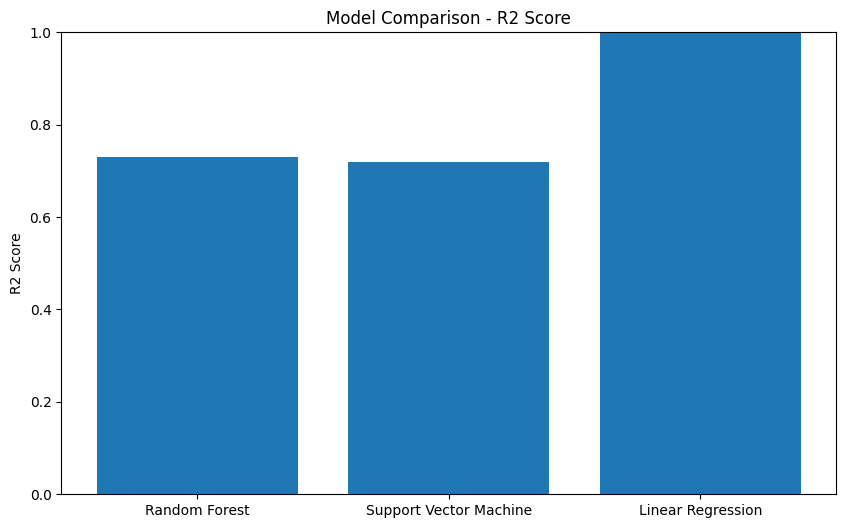

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt

# Load and prepare data
data = pd.read_csv('flood_kaggle.csv')
X = data.drop('FloodProbability', axis=1)
y = data['FloodProbability']

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Define models
models = {
    'Random Forest': RandomForestRegressor(n_estimators=100, random_state=42),
    'Support Vector Machine': SVR(),
    'Linear Regression': LinearRegression()
}

# Train and evaluate models
results = {}
for name, model in models.items():
    model.fit(X_train_scaled, y_train)
    y_pred = model.predict(X_test_scaled)
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    results[name] = {'MSE': mse, 'R2': r2}
    print(f"{name} - MSE: {mse:.4f}, R2: {r2:.4f}")

# Visualize results
plt.figure(figsize=(10, 6))
plt.bar(results.keys(), [r['R2'] for r in results.values()])
plt.title('Model Comparison - R2 Score')
plt.ylabel('R2 Score')
plt.ylim(0, 1)
plt.show()

This notebook compares three different models: Random Forest, Support Vector Machine, and Linear Regression. You can expand on this by adding more models, implementing cross-validation, or adding feature importance comparisons across models.